# Facebook_Metrics

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math

from scipy.io import arff
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (confusion_matrix,plot_confusion_matrix,
                            ConfusionMatrixDisplay,accuracy_score,f1_score,
                            mean_squared_error, mean_absolute_error, max_error,
                            r2_score, explained_variance_score)

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

## Loading Data

In [7]:
# Datset = pd.read_csv("datasets\Diabetic_Retinopathy\messidor_features.arff") 
Datset = pd.read_csv('/Users/annikatimermanis/Desktop/project/Regression/Regression_Datasets/4_Facebook_Metrics/Facebook_Metrics.csv', delimiter=';') 


In [3]:
df = pd.DataFrame(Datset)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## Data Prepration And Analysis

In [4]:
print(np.count_nonzero(Datset==np.nan))

0


In [16]:
# frequency = df['127'].value_counts()
# print(frequency)
# print("---------------------------")

In [9]:
# plt.plot()
# plt.ylabel('Frequency')
# plt.xlabel('Class')
# plt.bar( ("1","0"), frequency)
# plt.suptitle("Distribution")
# plt.show()

In [21]:
# sns.pairplot(df, hue="Class")
# print("ok")

In [18]:
# plt.figure(figsize=(17,17))
# sns.heatmap(df.corr(), annot =True);

## Train and Test set

In [9]:
string_values = df["Type"]
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(string_values)
df["Type"] = integer_encoded
df = df.dropna()

x = df.iloc[:,:-1]
y = df.iloc[:, -1:]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
y_train = y_train.to_numpy().reshape(-1)

In [11]:
StScale = StandardScaler()
X_test = StScale.fit_transform(X_test)
X_train = StScale.fit_transform(X_train)

## Linear Regression

In [12]:
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

LinearRegression()

## Linear Regression Analysis

In [13]:
linear_r_predict = linear_r.predict(X_test)

In [15]:
# # print(classification_report(y_test, linear_r_predict))
# # print(confusion_matrix(y_test, linear_r_predict))
# print(accuracy_score(y_test, linear_r_predict))
print(mean_squared_error(y_test, linear_r_predict))
print(explained_variance_score(y_test, linear_r_predict))
print(r2_score(y_test, linear_r_predict))
# print(f1_score(y_test, linear_r_predict, average='weighted'))
# print(f1_score(y_test, linear_r_predict, average='macro'))
# ConfusionMatrixDisplay.from_predictions(y_test, linear_r_predict);

119526.46477180255
0.7062544893862528
0.7040274010807377


## Support Vector Regression

In [19]:
svr = SVR()

In [20]:
parameters = {
    'C': scipy.stats.uniform(1, 1000), 
    'gamma': scipy.stats.uniform(0.01, 1000)
#     'Kernel': ['rbf', 'poly', 'sigmoid']
#     'degree':[2,3,4,5,6]
}
svr_model = RandomizedSearchCV(svr, parameters, verbose=1, n_iter=5, random_state=0).fit(X_train, y_train)
svr_model.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'C': 964.6627605010293, 'gamma': 383.45151882577767}

In [21]:
svr_model.best_estimator_

SVR(C=964.6627605010293, gamma=383.45151882577767)

## Support Vector Regression Analysis

In [22]:
svr_predictions = svr_model.predict(X_test)

In [23]:
# # print(classification_report(y_test, linear_r_predict))
# # print(confusion_matrix(y_test, linear_r_predict))
# print(accuracy_score(y_test, linear_r_predict))
print(mean_squared_error(y_test, svr_predictions))
print(explained_variance_score(y_test, svr_predictions))
print(r2_score(y_test, svr_predictions))
# print(f1_score(y_test, linear_r_predict, average='weighted'))
# print(f1_score(y_test, linear_r_predict, average='macro'))
# ConfusionMatrixDisplay.from_predictions(y_test, linear_r_predict);

405589.4490174219
0.0
-0.0043245531364313194


## Decision Tree Regression

In [24]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

## Decision tree Analysis

In [25]:
tree_predictions = tree.predict(X_test)

In [26]:
# # print(classification_report(y_test, linear_r_predict))
# # print(confusion_matrix(y_test, linear_r_predict))
# print(accuracy_score(y_test, linear_r_predict))
print(mean_squared_error(y_test, tree_predictions))
print(explained_variance_score(y_test, tree_predictions))
print(r2_score(y_test, tree_predictions))
# print(f1_score(y_test, linear_r_predict, average='weighted'))
# print(f1_score(y_test, linear_r_predict, average='macro'))
# ConfusionMatrixDisplay.from_predictions(y_test, linear_r_predict);

180467.59595959596
0.5563335449607987
0.5531243771088783


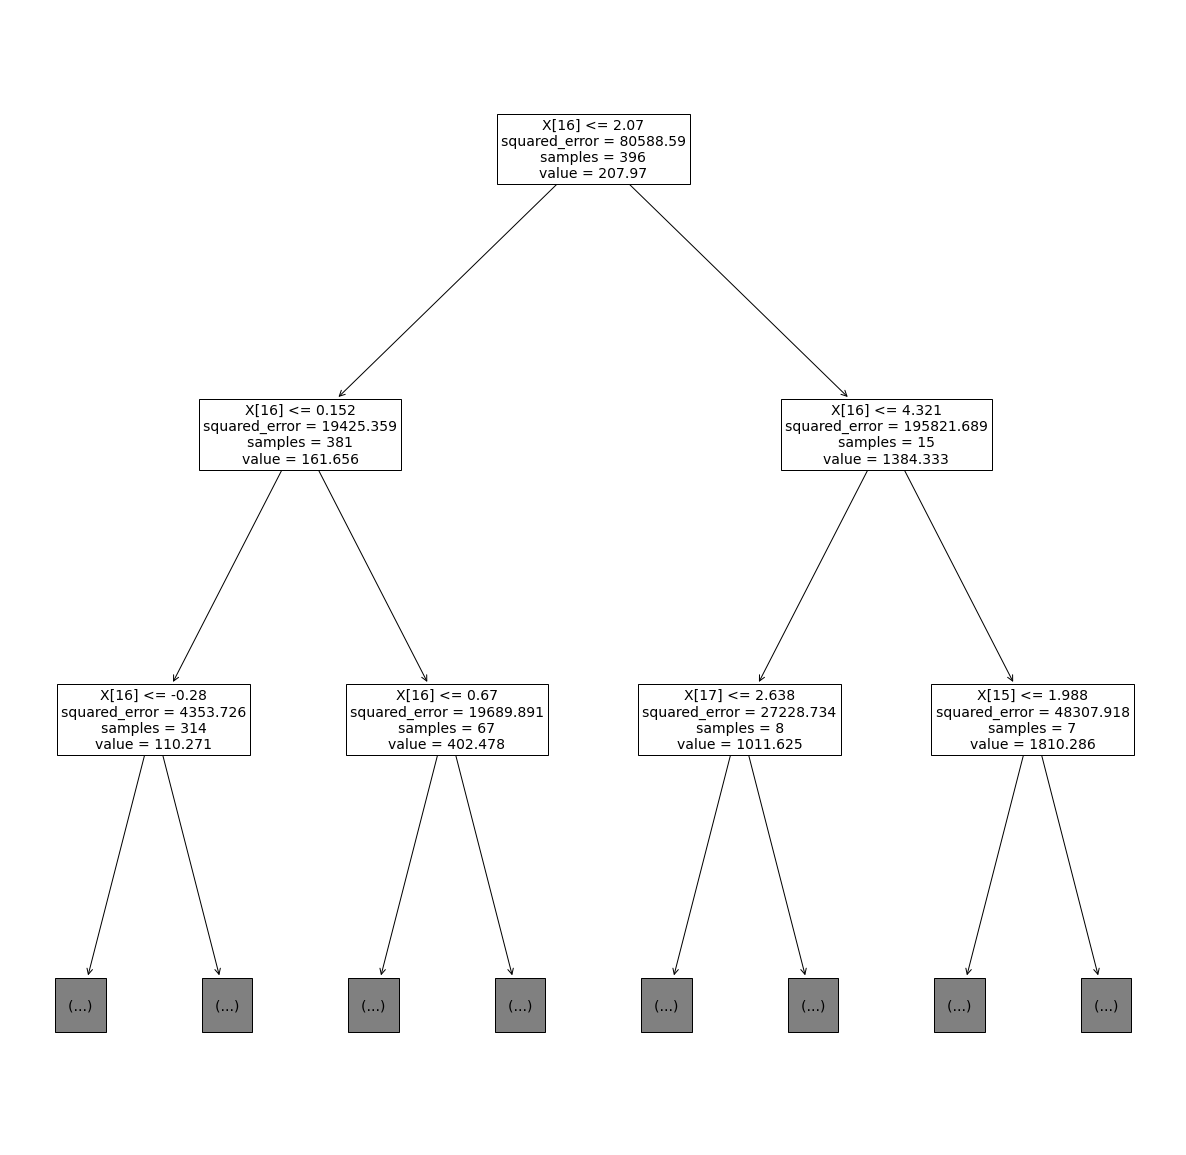

In [27]:
plt.figure(figsize=(21,21))
plot_tree(tree, max_depth = 2, fontsize=14);

## Random Forest Regression

In [28]:
forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)

## Random Forest Analysis

In [29]:
forest_predictions = forest.predict(X_test)

In [30]:
# # print(classification_report(y_test, linear_r_predict))
# # print(confusion_matrix(y_test, linear_r_predict))
# print(accuracy_score(y_test, linear_r_predict))
print(mean_squared_error(y_test, forest_predictions))
print(explained_variance_score(y_test, forest_predictions))
print(r2_score(y_test, forest_predictions))
# print(f1_score(y_test, linear_r_predict, average='weighted'))
# print(f1_score(y_test, linear_r_predict, average='macro'))
# ConfusionMatrixDisplay.from_predictions(y_test, linear_r_predict);

200986.72408989895
0.5058105329633458
0.5023147117190606


## K Nearest Neighbours Regression

In [50]:
# knn = KNeighborsClassifier()

In [85]:
# parameters = {
#     'n_neighbors': range(1, 100), 
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
#     'weights': ['uniform', 'distance'], 
#     'leaf_size': scipy.stats.uniform(1, 50)
# }
# knn_model = RandomizedSearchCV(knn, parameters,verbose=10,random_state=0).fit(X_train, y_train)
# knn_model.best_params_

In [56]:
# knn_model.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=41.60843643877466,
                     n_neighbors=47)

## KNN Analysis

In [57]:
knn_predictions = knn_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.55      0.82      0.66       101
           1       0.78      0.48      0.60       130

    accuracy                           0.63       231
   macro avg       0.67      0.65      0.63       231
weighted avg       0.68      0.63      0.63       231

[[83 18]
 [67 63]]
0.6320346320346321
0.6252257337773095
0.6292554898887861


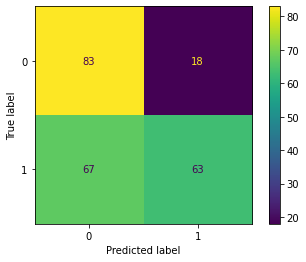

In [59]:
# print(classification_report(y_test, knn_predictions))
# print(confusion_matrix (y_test, knn_predictions))
# print(accuracy_score(y_test, knn_predictions))
# print(f1_score(y_test, knn_predictions, average='weighted'))
# print(f1_score(y_test, knn_predictions, average='macro'))
# ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions);